In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
monthly_report = pd.read_csv('monthly_report.csv')

In [3]:
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


In [9]:
# expectation is that purchase rate is 10% in population

bought = sum(monthly_report['purchase'] == 'y')
print(bought)
bought_rate = bought / len(monthly_report)
print(bought_rate)

41
0.082


In [10]:
left = sum(monthly_report['purchase'] == 'n')
print(left)
left_rate = left / len(monthly_report)
print(left_rate)

459
0.918


In [12]:
# another way to filter

bought = len(monthly_report[monthly_report['purchase'] == 'y'])
print(bought)
bought_rate = bought / len(monthly_report)
print(bought_rate)

41
0.082


In [13]:
left = len(monthly_report[monthly_report['purchase'] == 'n'])
print(left)
left_rate = left / len(monthly_report)
print(left_rate)

459
0.918


In [15]:
# yet another way
monthly_report['purchase'].value_counts(normalize=True) # percantage

n    0.918
y    0.082
Name: purchase, dtype: float64

In [16]:
monthly_report['purchase'].value_counts() #exact numbers

n    459
y     41
Name: purchase, dtype: int64

In [18]:
# example of simulation

flips = np.random.choice(['heads', 'tails'], size=100, p=[0.5, 0.5])
num_heads = np.sum(flips == 'heads')
print(num_heads)

49


In [22]:
# simulate for data

simulated_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
num_y = np.sum(simulated_visitors == 'y') / 500 * 100
print(num_y)

11.600000000000001


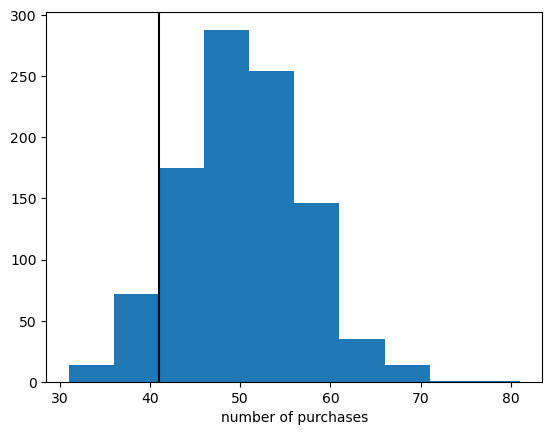

In [26]:
# what kind of distribution do we have?

y_results = []
for i in range (1000):
    simulated_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_y = np.sum(simulated_visitors == 'y') 
    y_results.append(num_y)

plt.hist(y_results)
plt.xlabel('number of purchases')
plt.axvline(41, color = 'black')
plt.show()

Null: probability of a purchase is 10%

Alternative: probability of a purchase is less then 10%

In [30]:
p_value = np.sum(np.array(y_results) <= 41) / len(y_results)
p_value

0.108

In [31]:
# or just use a ready function
from scipy.stats import binom_test

p_value = binom_test(41, 500, p=0.1, alternative='less')
p_value

0.10011352697567076

Conclusion: we fail to reject null and conclude that probability of a purchase is less then 10%